__Eithar Elfatih Burie Abdelrahman DS2403__

# Understanding the Attrition in HR

# __1.i Problem Identification__

__Project Description__

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

__HR Analytics__
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

__Attrition in HR__
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip





__________________________

# 1.ii Import necessary libraries

In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import skew, stats,boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read dataset
hr_path='C:\\Users\\eitha\\OneDrive\\Documents\\DataTrained\\elective and intrnshp\\fliprobo\\Evaluation projects\\.zip'
#create data frame
df=pd.read_csv(hr_path)


_______

# Load/Read Data

__ Head / Tail__

In [3]:
#show dataset head 
df.head()
pd.set_option('display.max_columns', None)

In [4]:
#show dataset tail
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1127,23,No,Travel_Rarely,977,Research & Development,10,3,Technical Degree,1,1592,4,Male,45,4,1,Research Scientist,3,Married,2073,12826,2,Y,No,16,3,4,80,1,4,2,3,2,2,2,2
137,39,No,Travel_Rarely,1329,Sales,4,4,Life Sciences,1,182,4,Female,47,2,2,Sales Executive,3,Married,5902,14590,4,Y,No,14,3,3,80,1,17,1,4,15,11,5,9
81,35,No,Travel_Rarely,1214,Research & Development,1,3,Medical,1,105,2,Male,30,2,1,Research Scientist,3,Single,2859,26278,1,Y,No,18,3,1,80,0,6,3,3,6,4,0,4
843,26,No,Travel_Rarely,1384,Research & Development,3,4,Medical,1,1177,1,Male,82,4,1,Laboratory Technician,4,Married,4420,13421,1,Y,No,22,4,2,80,1,8,2,3,8,7,0,7
70,59,No,Travel_Frequently,1225,Sales,1,1,Life Sciences,1,91,1,Female,57,2,2,Sales Executive,3,Single,5473,24668,7,Y,No,11,3,4,80,0,20,2,2,4,3,1,3
558,32,No,Travel_Frequently,430,Research & Development,24,4,Life Sciences,1,772,1,Male,80,3,2,Laboratory Technician,4,Married,5309,21146,1,Y,No,15,3,4,80,2,10,2,3,10,8,4,7
499,33,No,Travel_Rarely,1216,Sales,8,4,Marketing,1,677,3,Male,39,3,2,Sales Executive,3,Divorced,7104,20431,0,Y,No,12,3,4,80,0,6,3,3,5,0,1,2
401,56,No,Travel_Frequently,906,Sales,6,3,Life Sciences,1,532,3,Female,86,4,4,Sales Executive,1,Married,13212,18256,9,Y,No,11,3,4,80,3,36,0,2,7,7,7,7
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7
1236,36,Yes,Travel_Rarely,1456,Sales,13,5,Marketing,1,1733,2,Male,96,2,2,Sales Executive,1,Divorced,6134,8658,5,Y,Yes,13,3,2,80,3,16,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#move attrition to first column
# list of columns 
cols_=list(df.columns)

cols_.remove('Attrition')
order_=['Attrition'] + cols_

df_=df[order_]

df_.tail(5)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,No,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


__Data Structure__

2.ii.i Size, Shape and Columns  

In [7]:
# show size/shapecolumns of our dataset.
print('The dataset has a size of:',df_.size)
print('The dataset has a shape:',df_.shape)


The dataset has a size of: 51450
The dataset has a shape: (1470, 35)


2.ii.ii DataType

In [8]:
# show data types
print('The data type of each column is as follows:\n',df_.dtypes)

The data type of each column is as follows:
 Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptio

The most prominent data type is int64 followed by object which is 9. 


___________________________________________________________________________


INFO

In [9]:
#Show information about the dataframe 
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

comment:


    - 

__________________________

# 3.Data Pre-processing 


__3.i Duplicates__


In [10]:
#indentify amount of duplicates (if any)
print('From this, we can see there are no duplicates in this data set.')
df_.duplicated().sum()

From this, we can see there are no duplicates in this data set.


0

__3.ii Missing Values__

In [11]:
# sum of missing values in data set 
print('From this, we can see there are no missing values in this data set.')
df_.isnull().sum()

From this, we can see there are no missing values in this data set.


Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

3.ii.i Heatmap of nulls

<Axes: >

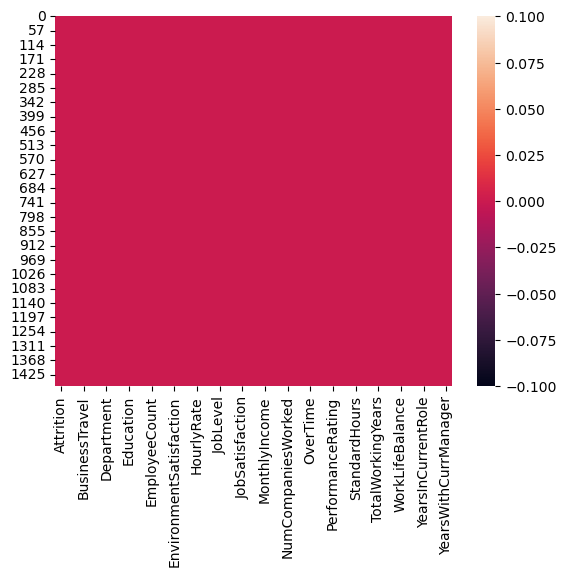

In [12]:
sns.heatmap(df_.isna())

__3.ii.ii Summary of data reading__


-All columns are of type 'int 64' and 'object'.
-There are no duplicates.
-There are no null values.
-There is both numerical (26) and categorical data (9) .
-'Attrition' is our target variable. The 34 other variables are independent.
- as Attrition is our target variable, our problem is classification in nature.

__Action__
- create seperate lists of categoicaland numerical columns 
-Study features more closely
-apply feature engineering where applicable

__________

# Univariate analysis 

Feature analysis 

In [13]:
df_.nunique().sort_values()

StandardHours                  1
Over18                         1
EmployeeCount                  1
Attrition                      2
PerformanceRating              2
OverTime                       2
Gender                         2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
WorkLifeBalance                4
EnvironmentSatisfaction        4
StockOptionLevel               4
RelationshipSatisfaction       4
JobInvolvement                 4
JobSatisfaction                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

Columns summary 
- 'StandardHours' - all employees have the same hours. irrelevant >>> drop
- 'Over18'- irrelevate to our porblem  >>> drop
- 'EmployeeCount' also irrelevant, adds no meaning to analysis >>> drop

- (TARGET)-- 'Attrition' --- our target, categorical in nature gives 'yes or 'no'   >>>> encode later for numerical analysis
- 'PerformanceRating' --- seems to be out of 5 but ll employees are either 3 or 4 >>> scale?
- 'OverTime' ---- yes or no >>> later encode 
- 'Gender' ---- male or female >>>> later encode 
- 'MaritalStatus- married, single, divorced ( very generalised) >>> is this relevant?
- Department--- ', Sales, Research & Development, Human Resources >>> encode
- BusinessTravel --- Travel_Rarely, Travel_Frequently, Non-Travel >>> affects cost 

- rating 1 to 10 (possible to b categorical)???
- WorkLifeBalance, EnvironmentSatisfaction , StockOptionLevel, RelationshipSatisfaction, JobInvolvement, JobSatisfaction, Education, JobLevel, EducationField, TrainingTimesLastYear, JobRole , NumCompaniesWorked

- rest are numerical with 15 unique values and above. can investigate further through grpahical analysis 
- EmployeeNumber --- Identification number and same as row count (drop)

# 3.iii EDA

drop irrelevant columns 

In [14]:
df_=df_.drop(columns=['StandardHours', 'Over18' , 'EmployeeCount', 'EmployeeNumber'])
df_.sample()
print ('After dropping unuseful columns the new shape is:', df_.shape)

After dropping unuseful columns the new shape is: (1470, 31)


__Univariate analysis__

Target Variable 'Attrition'

In [15]:
df_['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

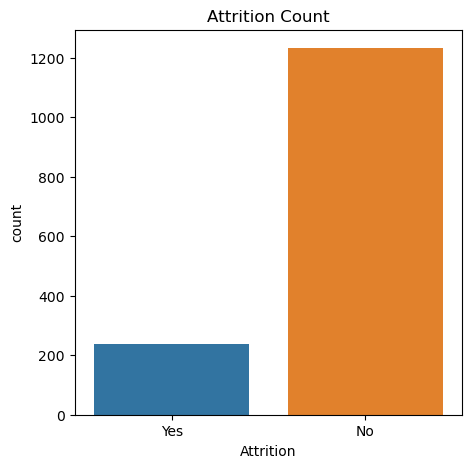

In [16]:
#graph
plt.figure(figsize=(5,5))
sns.countplot(x=df_['Attrition'],data=df_)
plt.title('Attrition Count')
plt.show()

- 'No' is much higher in count than 'Yes'
- very unbalanced 

__Numerical Features__

Separate data types

__Bivariate Analysis__

__Numerical features visual analysis__

In [17]:
# create categorical and numberical list 
num_cols=[]
cat_cols=[]

for col in df_.dtypes.index:
    if col =='Attrition':
        continue
    if df_.dtypes[col] =='int64' or df_.dtypes[col] =='float64':
        num_cols.append(col)
    else:
        cat_cols.append(col)
        
print(f'Numerical columns: \n{num_cols}\n')
print(f'Categorical columns:\n {cat_cols}')    


Numerical columns: 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical columns:
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


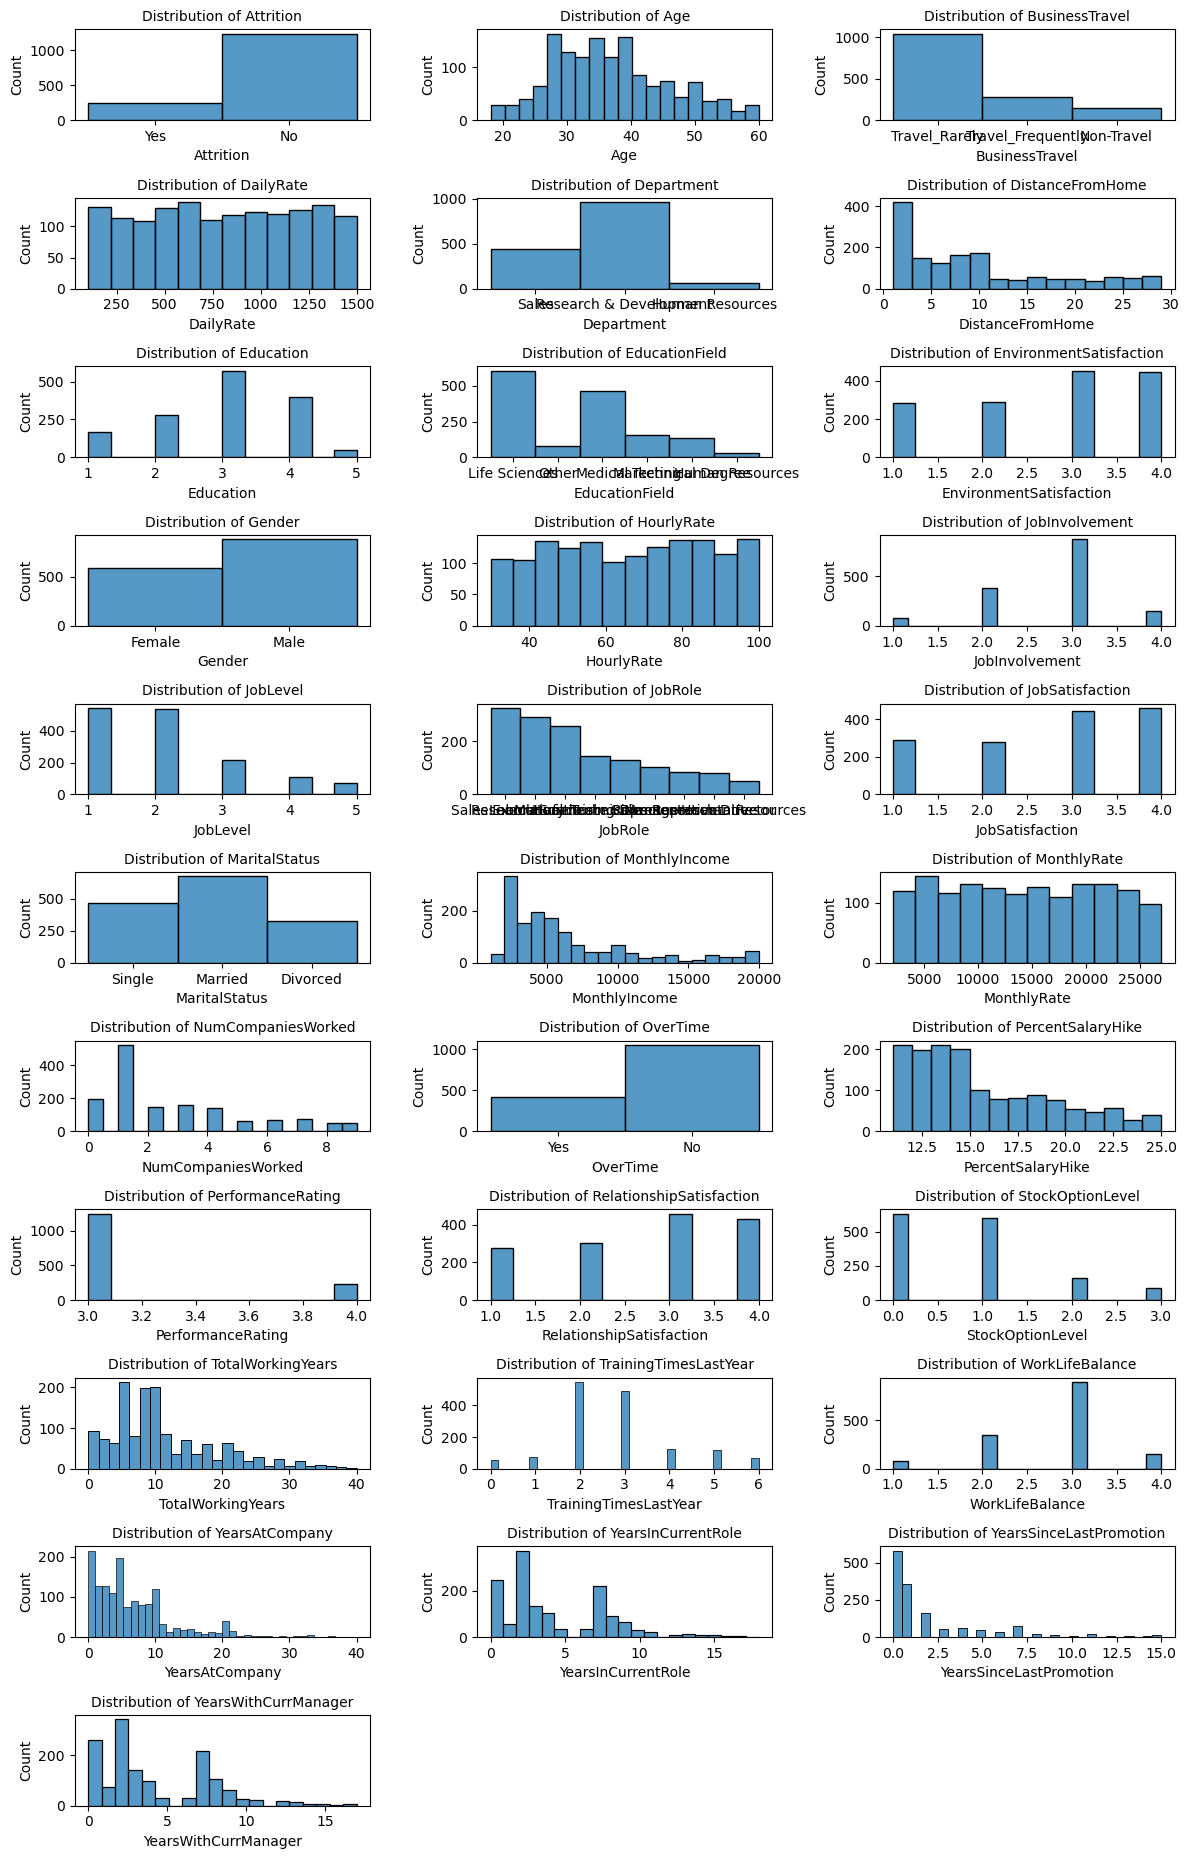

In [18]:
# plot distplots for numerical columns
plt.figure(figsize=(12, 25))

for i, col in enumerate(df_,1):
    plt.subplot(15,3,i)
    sns.histplot(df_[col],) 
    plt.title(f'Distribution of {col}', fontsize=10)

plt.tight_layout()
plt.show()

    

- Education, EnvironmentSatisfation, jobinvolvement, job level, jobsatisfaction, NumCompaniesWorked, Performance, RelationshipSatisfaction, StockOptionLevel all these columns can be considered categorical as they have limited unique values

- YearsinCurrentRole and YearsWithCurrentMAnager have similar distribution

- high right skewness in YearsSineLastPromotion

- some numerical columns seem reasonable to put as categorical

__action__

relist categorical and numerical

In [19]:
#add - Education, EnvironmentSatisfation, jobinvolvement, job level, jobsatisfaction, NumCompaniesWorked, Performance, RelationshipSatisfaction, StockOptionLevel to ategorical features
to_cat=[ 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
        'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

num_cols=[item for item in num_cols if item not in to_cat]

cat_cols.extend(to_cat)

print(f'new numerical column list: {num_cols}\n')
print(len(num_cols))
print(f'new categorical column list: {cat_cols}')
print(len(cat_cols))



new numerical column list: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

12
new categorical column list: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
18


__Categorical features visual analysis__

In [20]:
# unique values  of categories 
for i in cat_cols:
    print(i)
    print(df_[i].value_counts())
    print('_____________________________________________')

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_____________________________________________
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_____________________________________________
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_____________________________________________
Gender
Male      882
Female    588
Name: Gender, dtype: int64
_____________________________________________
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources             

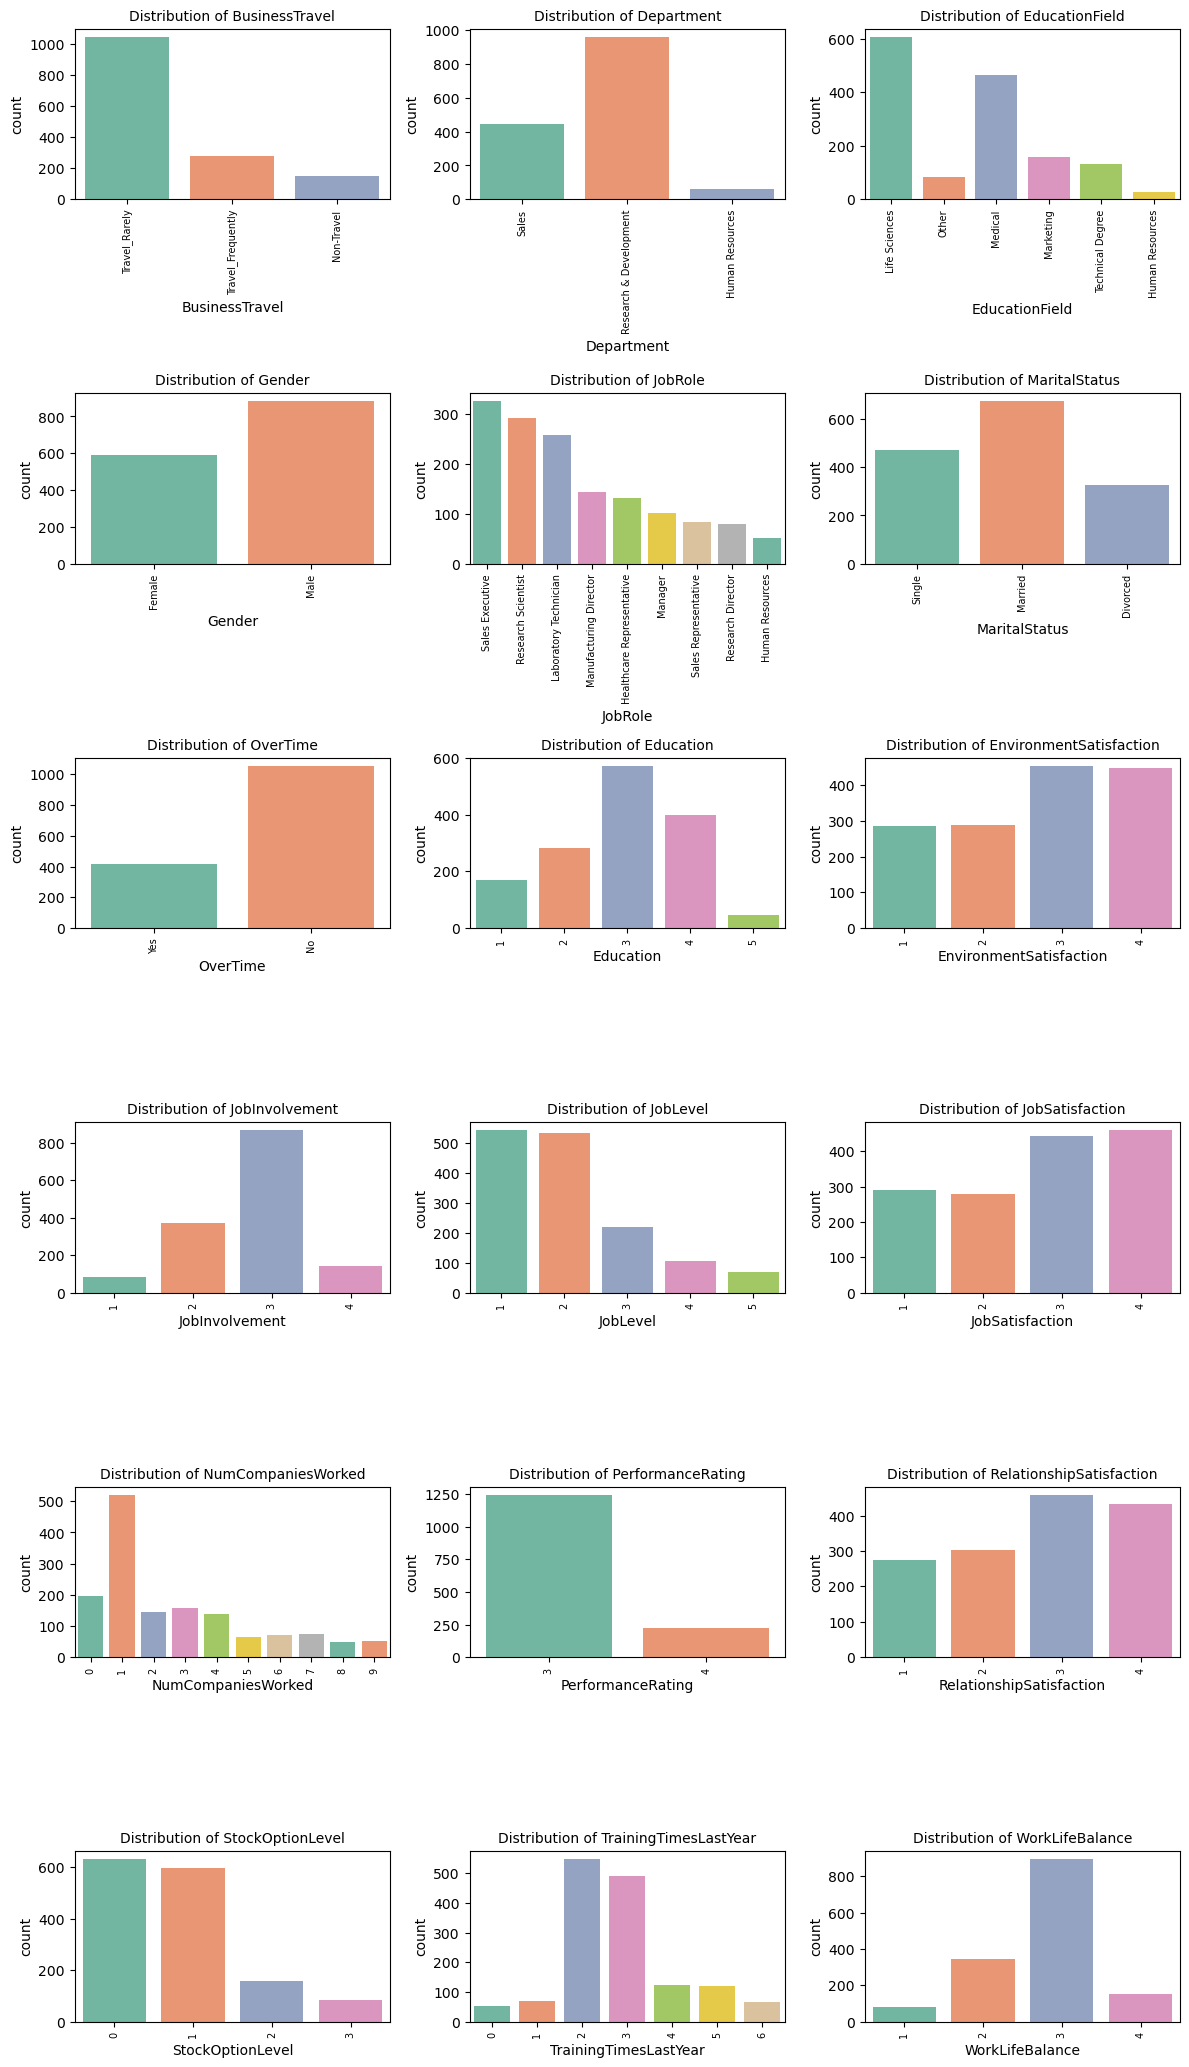

In [21]:
# plot countplots for num_cat_cols columns
plt.figure(figsize=(12, 35))

for i, col in enumerate(cat_cols,1):
    plt.subplot(10,3,i)
    sns.countplot(x=col, data=df_, palette='Set2') 
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()


- BusinessTravel --- interestingly has a high rare travel rate, probably more cost effective and travel frequently is more likely to be emplyees of higher positions becasue the are less. very un balance 
- Department --- majority of employees work in research and development, least in HR
- EducationField ---life sciences and medical are significantly more than other fields of education, which are probably research and development
- Gender --- females are less than males 
- JobRole --- general positions of sales, research and technician are highest in frequency at the company 
- MaritalStatus --- majoirty of employess are married. not sure of this relevance to the problem 
- OverTime --- most employess do not engage in over time 
- 'Education' --- 
- 'EnvironmentSatisfaction' ---
- 'JobInvolvement' ---
- 'JobLevel' ---
- 'JobSatisfaction' ---
- 'NumCompaniesWorked' ---
- 'PerformanceRating' ---
- 'RelationshipSatisfaction' ---
- 'StockOptionLevel' ---

lets look at the numerical categorical columns alone

__numerical columns__

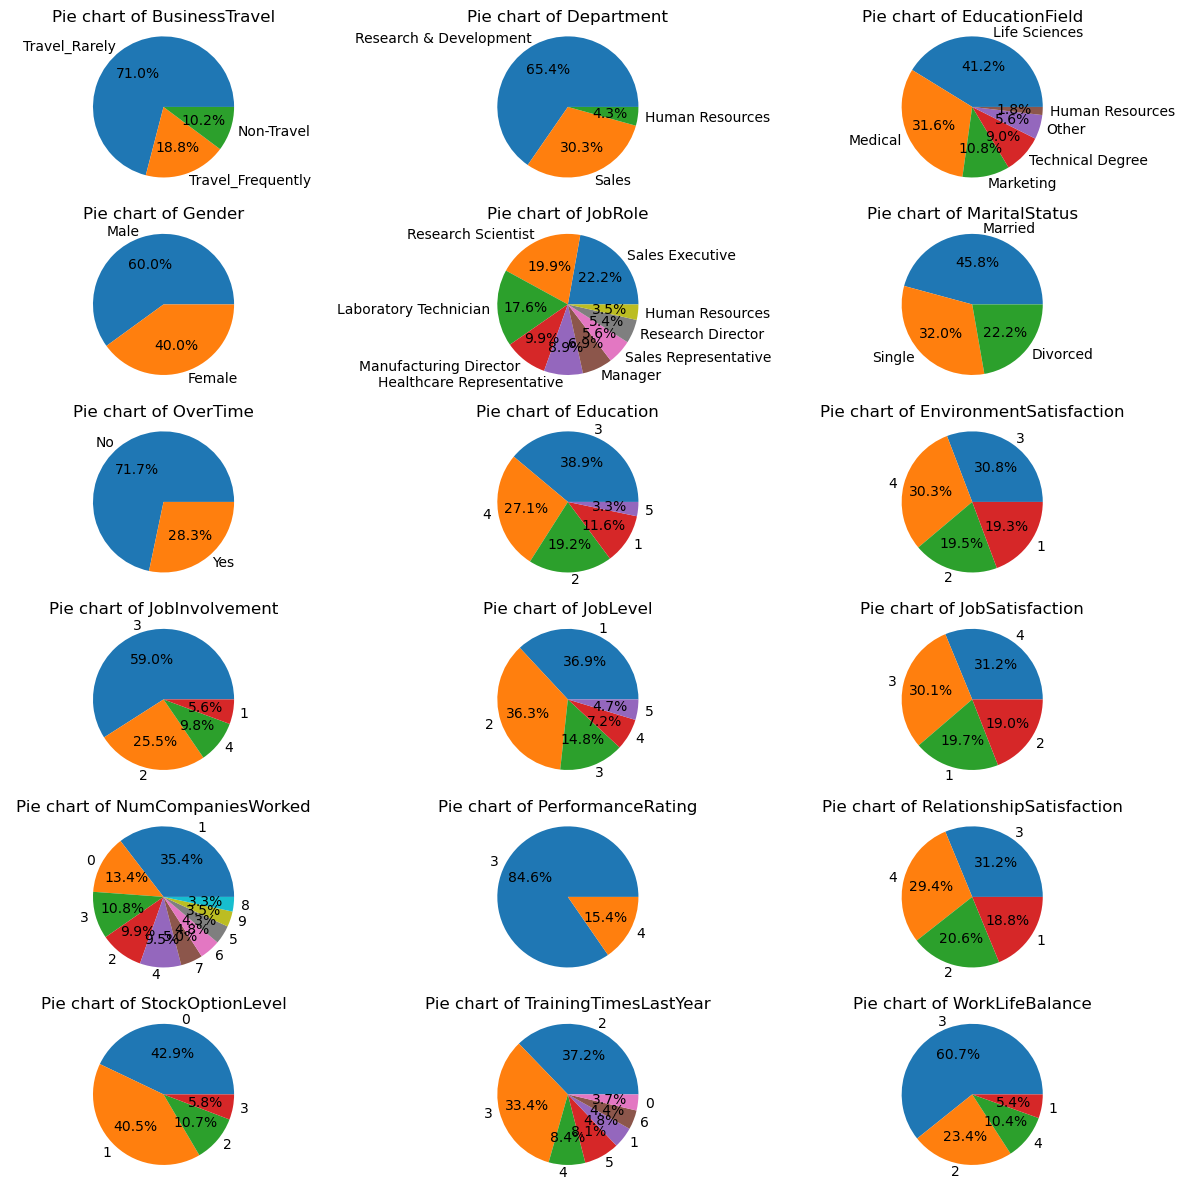

In [22]:
# pieplot of categorical columns
plt.figure(figsize=(12, 12))

for i, col in enumerate(cat_cols,1):
    plt.subplot(6,3,i)
    
    cat_count=df_[col].value_counts()
    tot_count=len(df_)
    pers_= cat_count / tot_count
    
    
    plt.pie(pers_, labels=cat_count.index, autopct='%1.1f%%', radius=1.5)
    plt.title(f'Pie chart of {col}')
    plt.axis('equal')

plt.tight_layout()
plt.show()




***************** boxplots

target vs numerical features


<Figure size 1300x500 with 0 Axes>

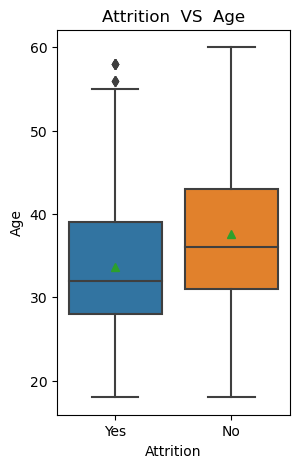

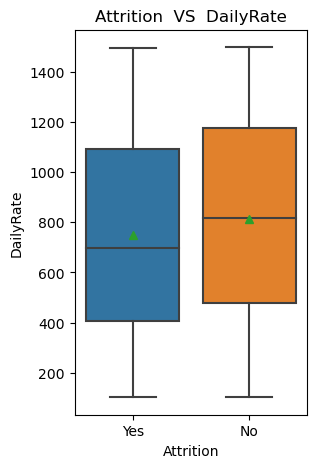

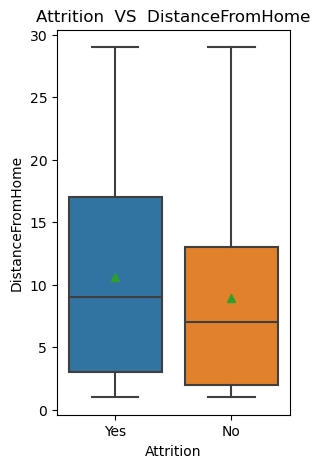

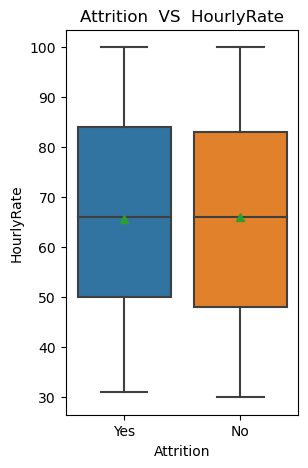

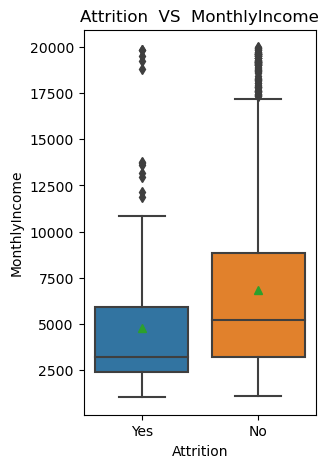

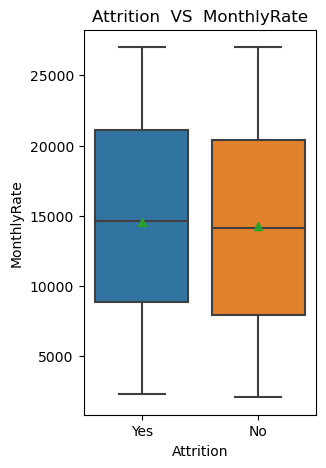

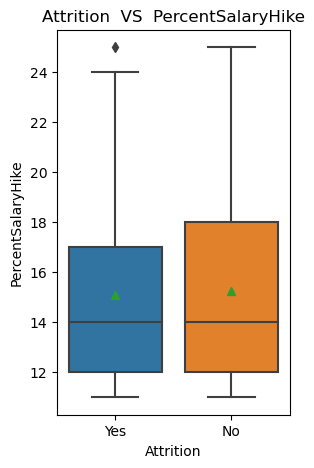

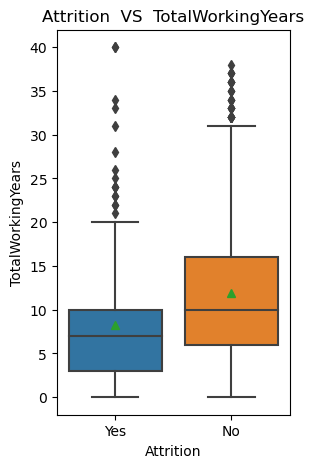

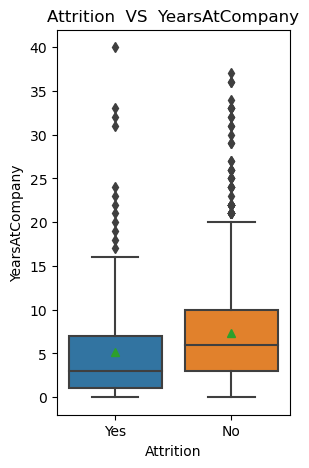

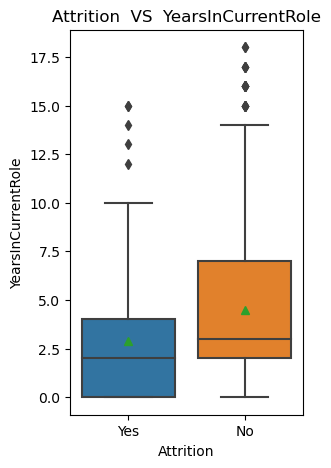

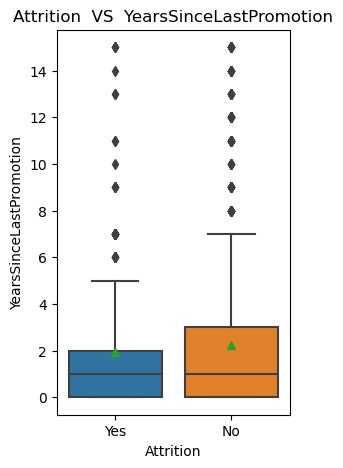

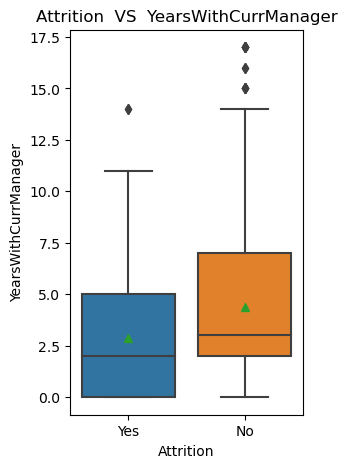

In [23]:

plt.figure(figsize=(13,5))
#loop
for col in num_cols:
    
    plt.figure(figsize=(3,5))
    sns.boxplot(x='Attrition', y=col, data=df_, showmeans=True)
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.title(f'Attrition  VS  {col}')
    plt.show()
    

- outliers apparent in Age, MonthlyIncome, PercentSalaryHike,
TotalWorkingYears, TraingTimesLastYear, YearsAtCompany, YearsIncurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
- imbalance in data

pairplots

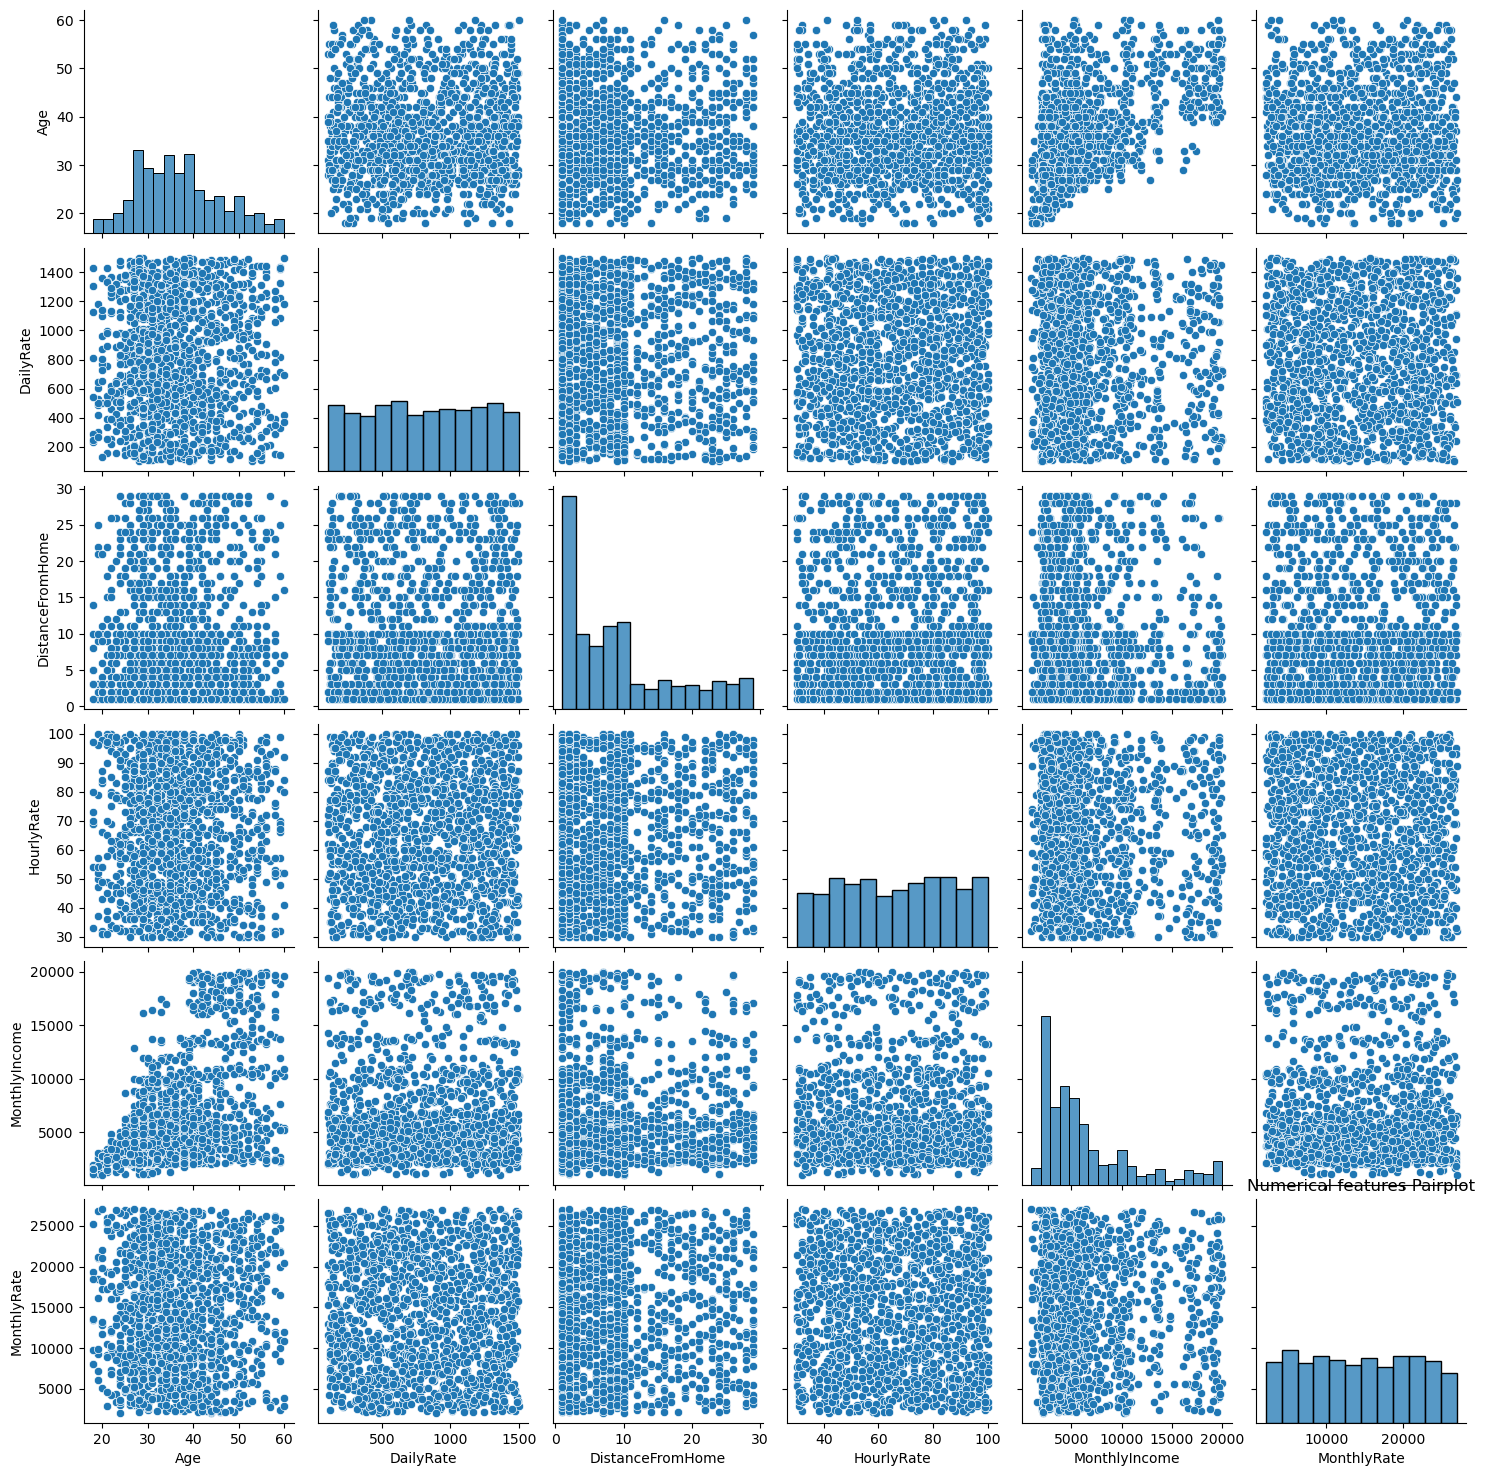

In [24]:
num_cols_1=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']
num_cols_2=['PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
sns.pairplot(df_[num_cols_1])
plt.title('Numerical features Pairplot')
plt.show()

- 

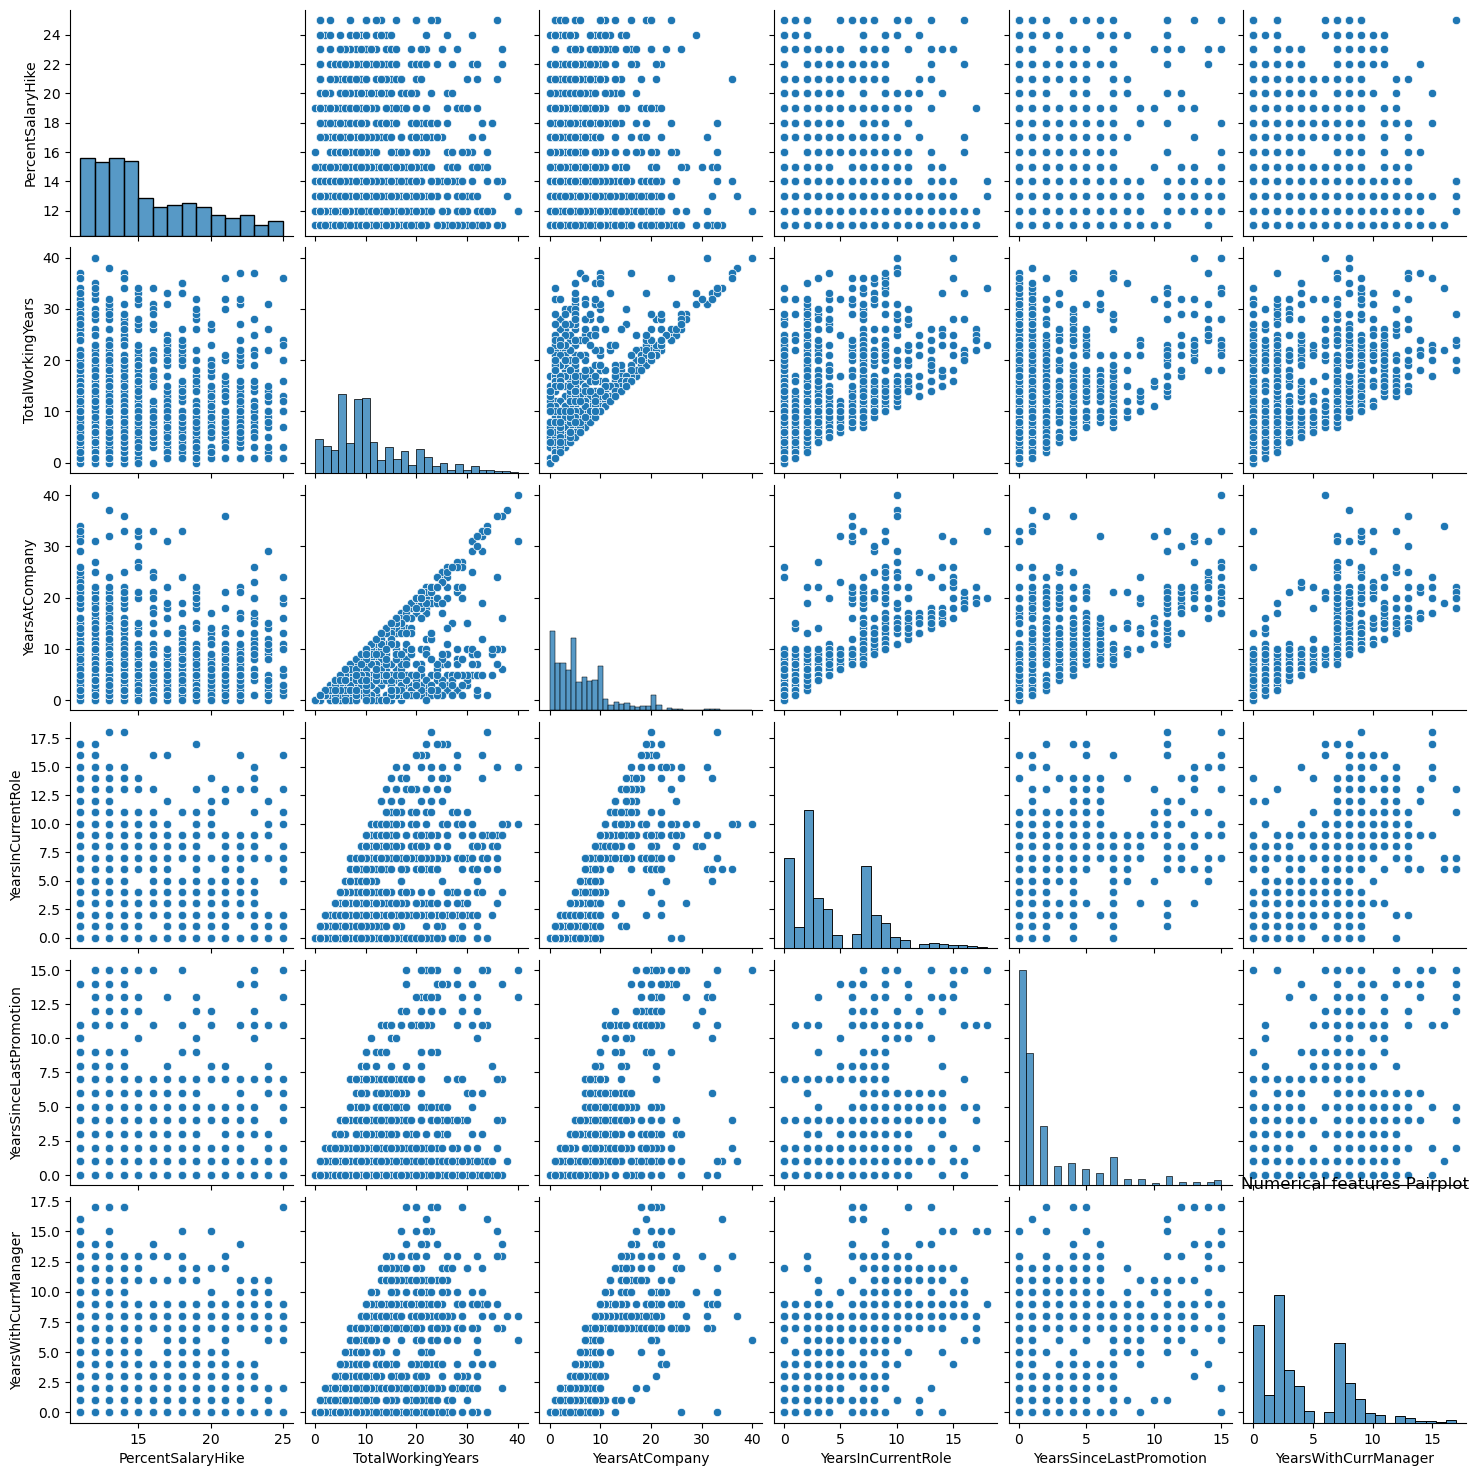

In [25]:
sns.pairplot(df_[num_cols_2])
plt.title('Numerical features Pairplot')
plt.show()

In [26]:
cat_cols_1=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'] 
cat_cols_2=['OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction']
cat_cols_3=['NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']



- 

-

__Multivariate Analysis__

<Axes: >

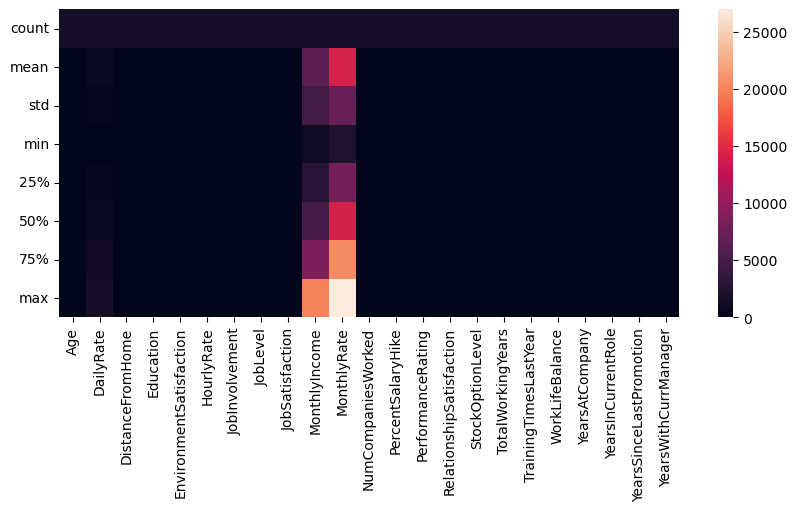

In [27]:
plt.figure(figsize=(10,4))
sns.heatmap(df_.describe())

In [28]:
# show description summary 
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


summary 

- data looks good, no negative numbers, nulls and all columns are the same in count  .
- features are on very different scales of measure
-

In [29]:
# encode grades 

lab_en=LabelEncoder()
for col in df_.columns:
    if col in cat_cols or col == 'Attrition':
        df_[col]=lab_en.fit_transform(df_[col])
df_.head(5)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,1,1,1,0,94,2,1,7,3,2,5993,19479,8,1,11,0,0,0,8,0,0,6,4,0,5
1,0,49,1,279,1,8,0,1,2,1,61,1,1,6,1,1,5130,24907,1,0,23,1,3,1,10,3,2,10,7,1,7
2,1,37,2,1373,1,2,1,4,3,1,92,1,0,2,2,2,2090,2396,6,1,15,0,1,0,7,3,2,0,0,0,0
3,0,33,1,1392,1,3,3,1,3,0,56,2,0,6,2,1,2909,23159,1,1,11,0,2,0,8,3,2,8,7,3,0
4,0,27,2,591,1,2,0,3,0,1,40,2,0,2,1,1,3468,16632,9,0,12,0,3,1,6,3,2,2,2,2,2


In [30]:
print(df_.shape)

(1470, 31)


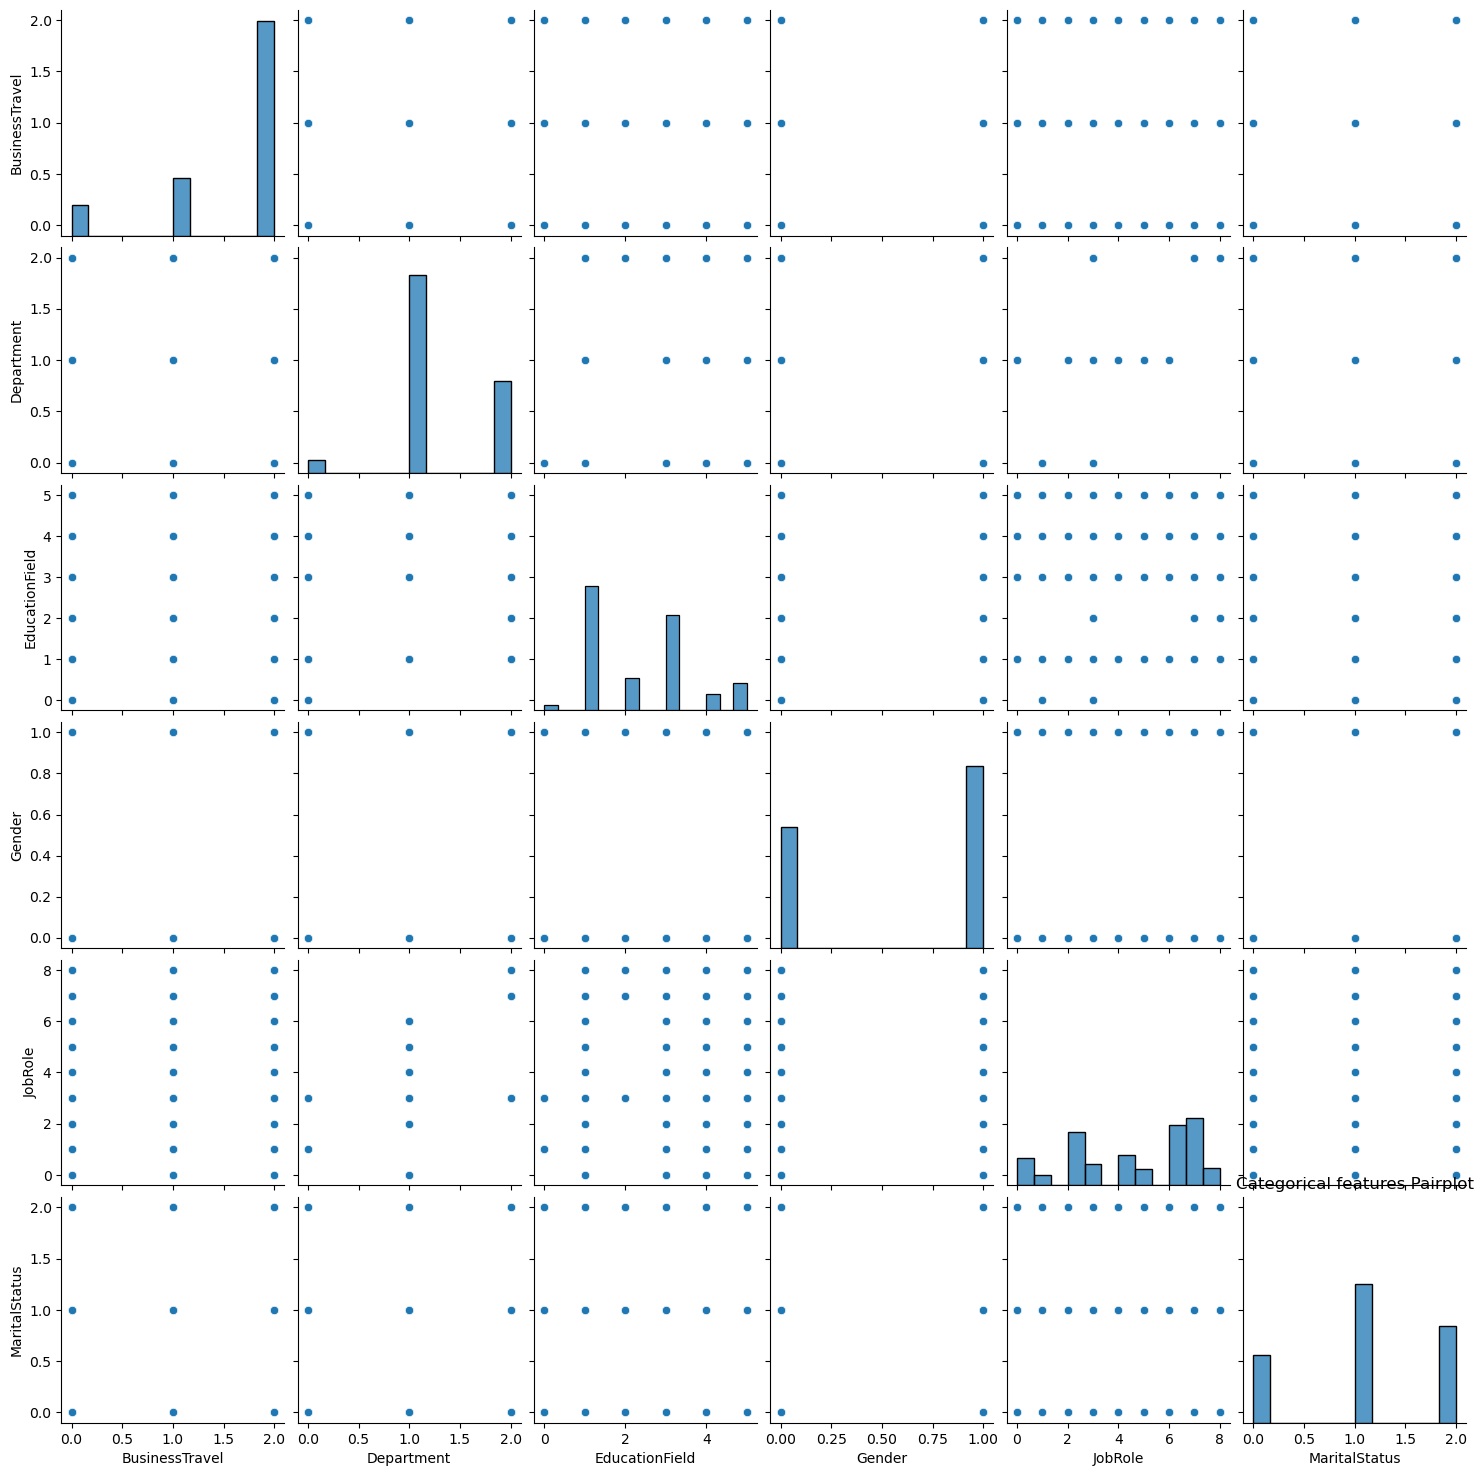

In [31]:
sns.pairplot(df_[cat_cols_1])
plt.title('Categorical features Pairplot')
plt.show()

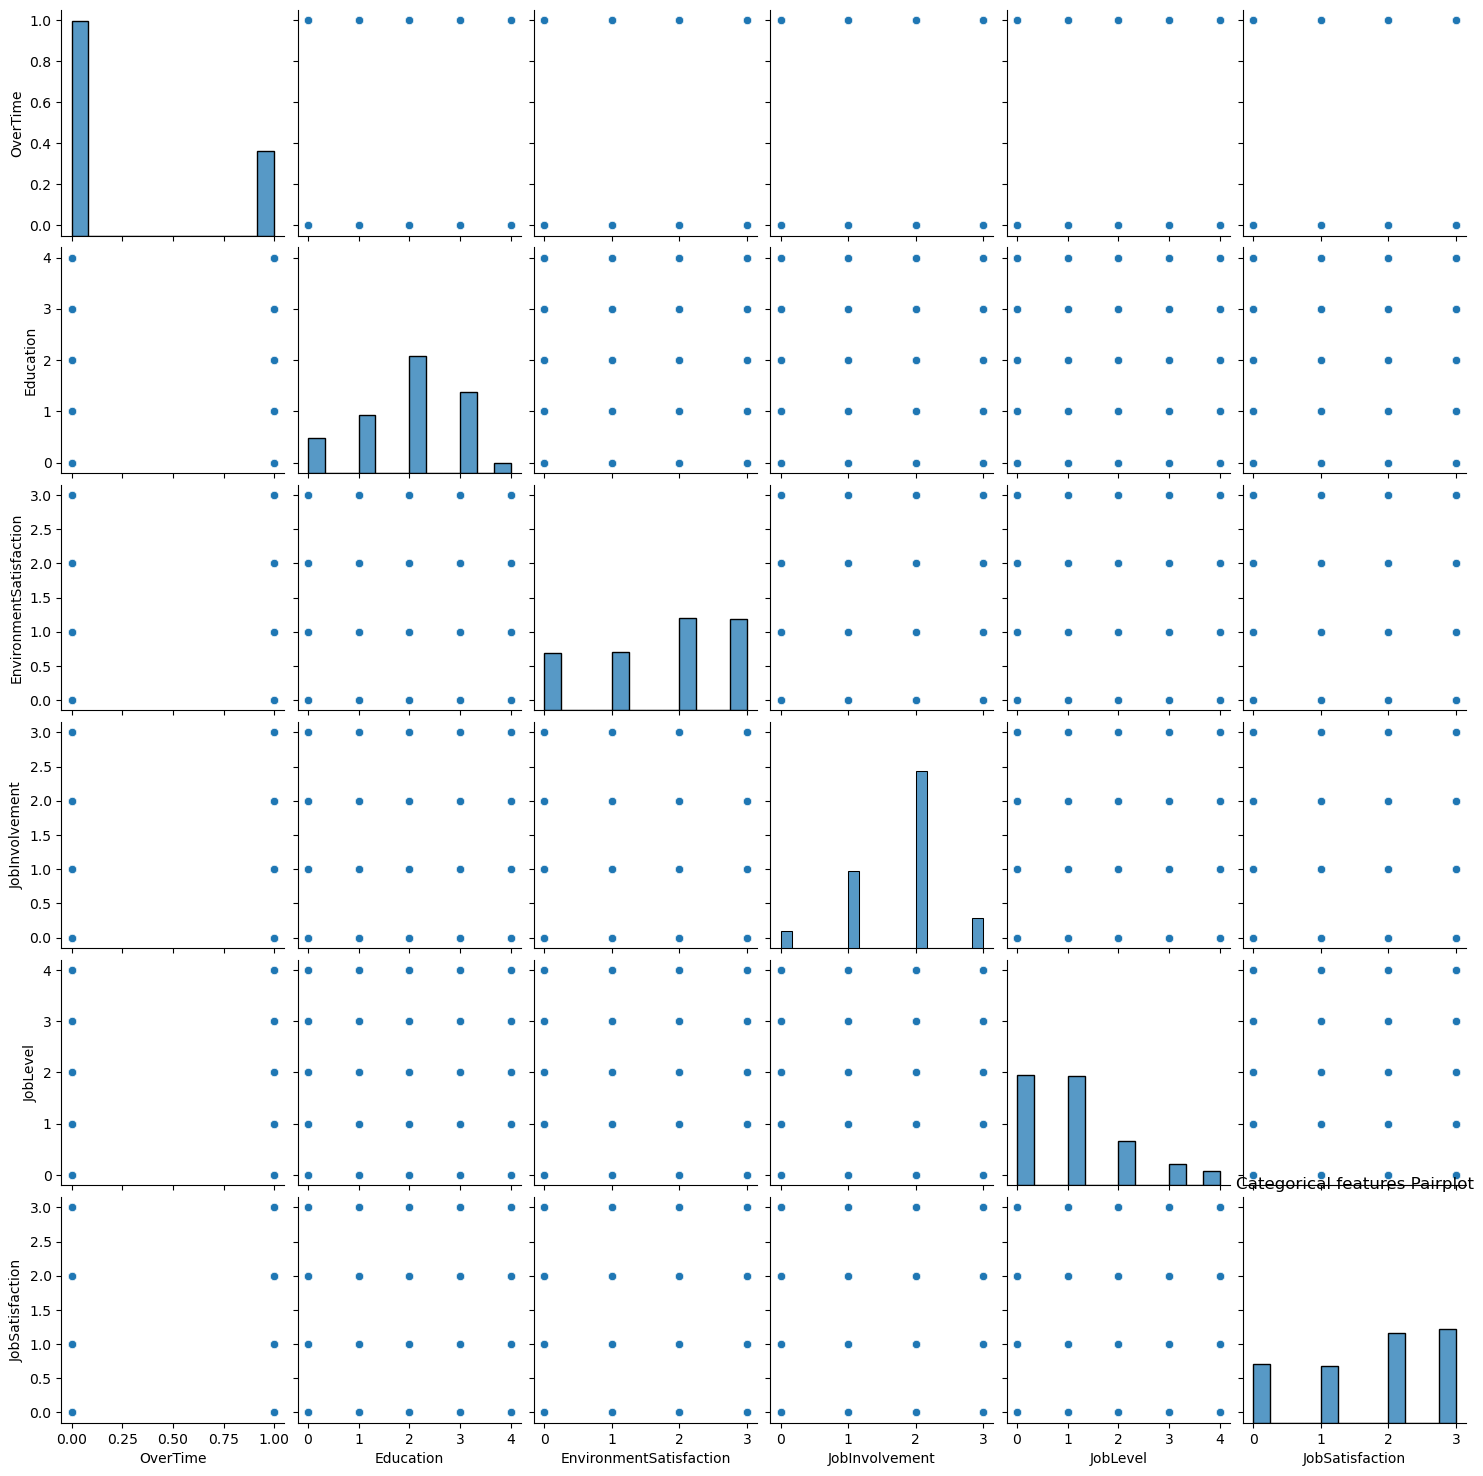

In [32]:
sns.pairplot(df_[cat_cols_2])
plt.title('Categorical features Pairplot')
plt.show()

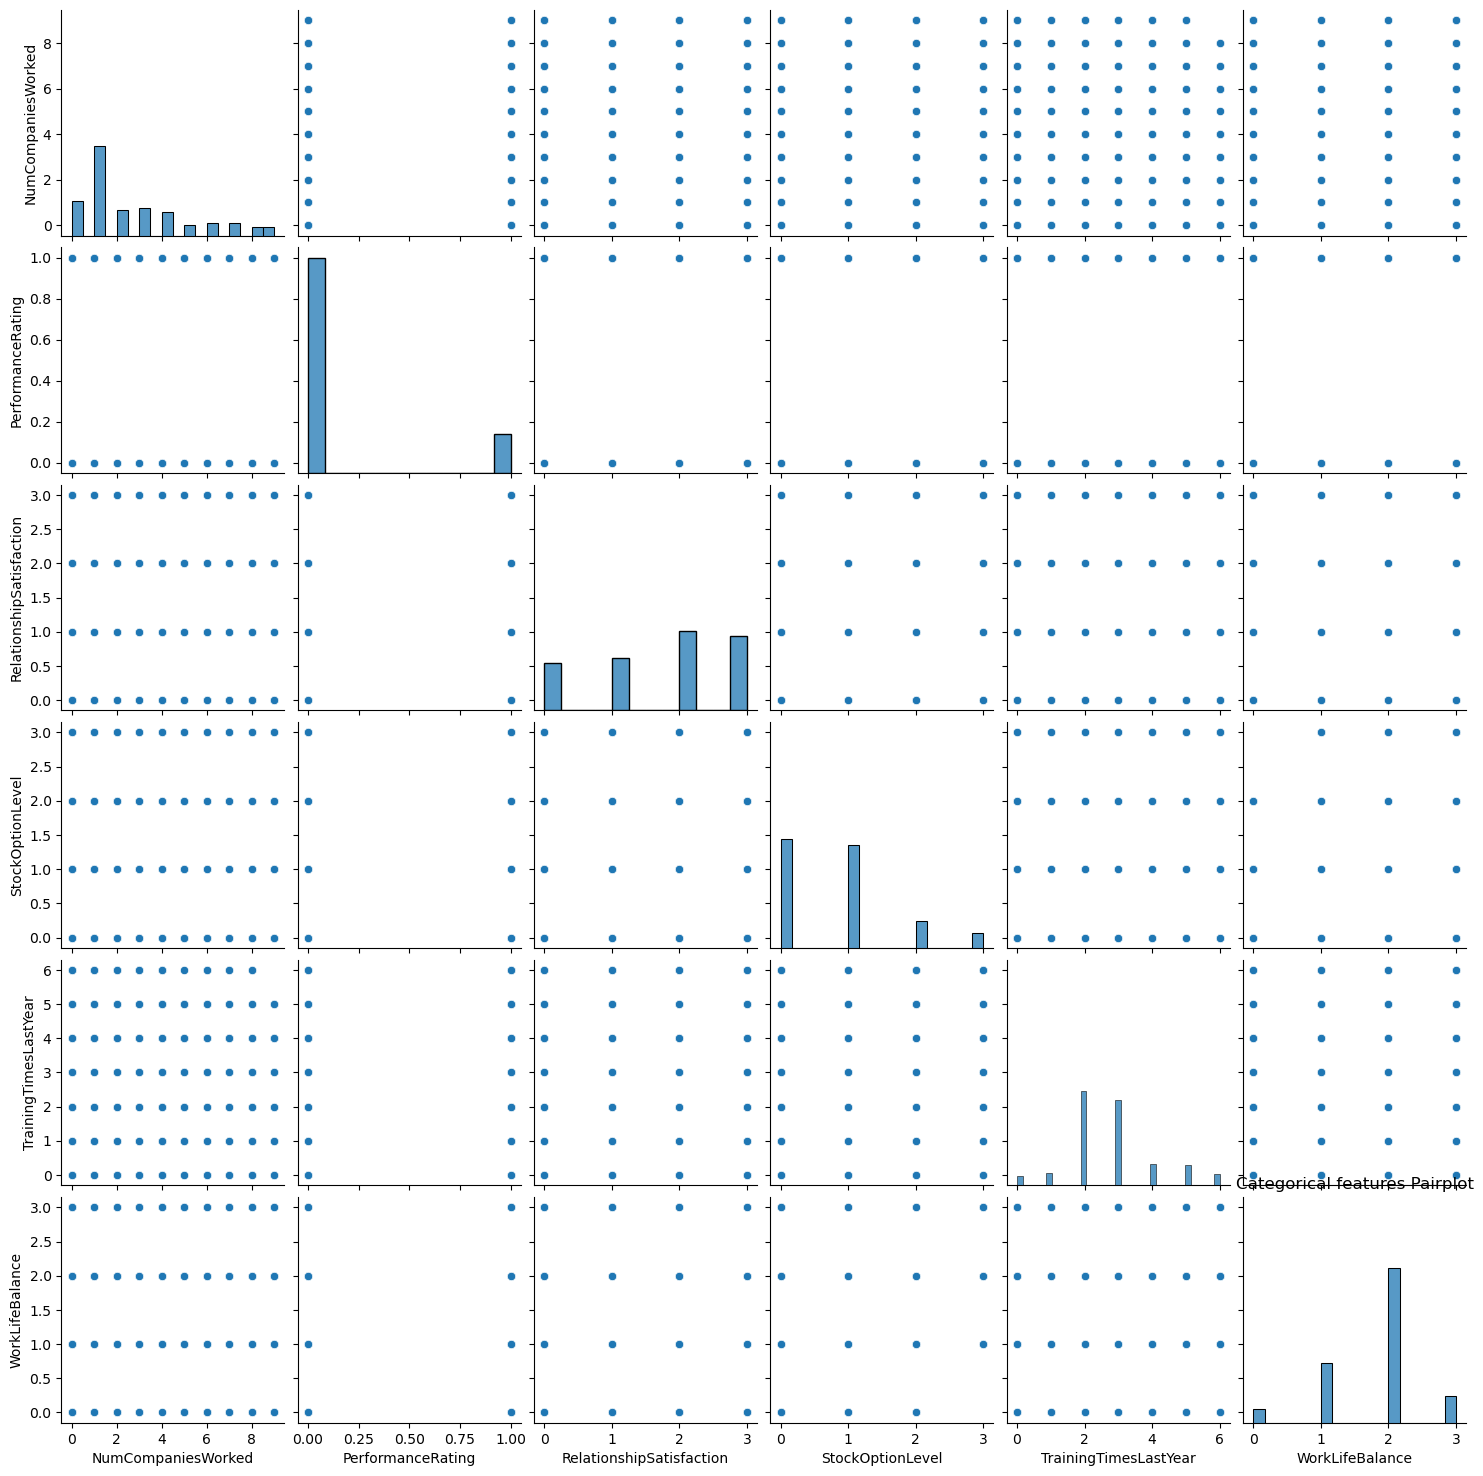

In [33]:
sns.pairplot(df_[cat_cols_3])
plt.title('Categorical features Pairplot')
plt.show()

<Axes: >

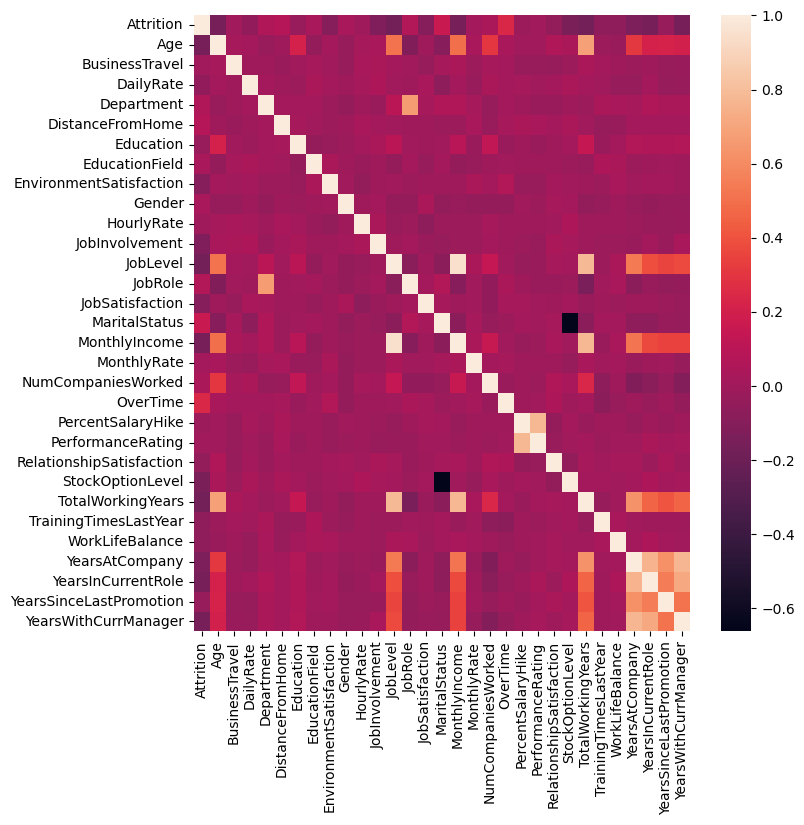

In [34]:
df_.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_.corr())

- majority of features have correlation to each other around o
- highest correlation to Attiriton is 'DistanceFromHOme'
- Lowest negative correlation is with TotalWorkingYears(-0.17)
- highly correlated with each other 
        - 
-

In [35]:
# list of correlation to attritiion
corr_=df_.corr()
att_corr=corr_['Attrition']

att_df=att_corr.reset_index()
att_df.columns=['Feature', 'Correlation to Attrition']

att_df=att_df.sort_values(by='Correlation to Attrition', ascending=False )
att_df

,Feature,Correlation to Attrition
0,Attrition,1.000000
19,OverTime,0.246118
15,MaritalStatus,0.162070
5,DistanceFromHome,0.077924
13,JobRole,0.067151
4,Department,0.063991
18,NumCompaniesWorked,0.043494
9,Gender,0.029453
7,EducationField,0.026846
17,MonthlyRate,0.015170


In [36]:
att_df.shape

(31, 2)

- relation to 'Attirition' is within the range of -0.171063 - 0.246118 , this is a very small range of difference
- It has weak positive relationships with the postive coeffiencients and wek negative ones also
-

skewness - numerical

In [37]:
#showing skew for categorical 
df_.skew().sort_values()

BusinessTravel             -1.439006
WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
Gender                     -0.408665
JobRole                    -0.357270
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
MaritalStatus              -0.152175
HourlyRate                 -0.032311
DailyRate                  -0.003519
MonthlyRate                 0.018578
Department                  0.172231
Age                         0.413286
EducationField              0.550371
TrainingTimesLastYear       0.553124
PercentSalaryHike           0.821128
YearsWithCurrManager        0.833451
YearsInCurrentRole          0.917363
DistanceFromHome            0.958118
OverTime                    0.964489
StockOptionLevel            0.968980
JobLevel                    1.025401
NumCompaniesWorked          1.026471
TotalWorkingYears           1.117172
MonthlyIncome               1.369817
Y

In [38]:
#log transform skew
df_['PercentSalaryHike']=np.log1p(df_['PercentSalaryHike'])
df_['YearsWithCurrManager']=np.log1p(df_['YearsWithCurrManager'])
df_['YearsInCurrentRole']=np.log1p(df_['YearsInCurrentRole'])
df_['DistanceFromHome']=np.log1p(df_['DistanceFromHome'])
df_['TotalWorkingYears']=np.log1p(df_['TotalWorkingYears'])
df_['MonthlyIncome']=np.log1p(df_['MonthlyIncome'])
df_['YearsAtCompany']=np.log1p(df_['YearsAtCompany'])
df_['YearsSinceLastPromotion']=np.log1p(df_['YearsSinceLastPromotion'])

print(df_[['PercentSalaryHike', 'YearsWithCurrManager', 'YearsInCurrentRole', 'DistanceFromHome', 'TotalWorkingYears',
          'MonthlyIncome', 'YearsAtCompany', 'YearsSinceLastPromotion' ]].skew().sort_values())


TotalWorkingYears         -0.622175
YearsInCurrentRole        -0.383498
YearsWithCurrManager      -0.357686
YearsAtCompany            -0.207708
DistanceFromHome          -0.029121
MonthlyIncome              0.286448
PercentSalaryHike          0.513543
YearsSinceLastPromotion    0.718805
dtype: float64


In [39]:
X=df_.drop('Attrition', axis=1)
Y=df_['Attrition']

print(f'Target dataframe dimension:,{X.shape}')
print(f'Y dataframe dimension:,{Y.shape}')

Target dataframe dimension:,(1470, 30)
Y dataframe dimension:,(1470,)


__remove outliers__

In [40]:
#- Z score Method 

# calculate z-score 

z_scores= stats.zscore(df_)

df_zscore=np.abs(z_scores)

#define threshold 
threshold =3

#create df with no outliers 
df_hr=df_[(df_zscore < threshold).all(axis=1)]
print('The new dataframe without outliers:', df_hr.shape)
print('Percentage of data loss', (df_.shape[0]-df_hr.shape[0])/df_.shape[0]*100)
df_hr.sample(5)

The new dataframe without outliers: (1459, 31)
Percentage of data loss 0.7482993197278911


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
474,0,24,2,691,1,3.178054,2,3,1,1,89,3,0,6,3,1,7.910591,21630,1,1,2.484907,0,1,2,1.945910,3,2,1.945910,1.791759,0.693147,1.609438
264,1,28,2,529,1,1.098612,3,1,0,1,79,2,0,2,2,2,8.156510,14935,2,0,2.484907,0,2,0,1.791759,5,0,0.000000,0.000000,0.000000,0.000000
749,1,52,2,266,2,1.098612,0,2,0,0,57,0,4,3,3,1,9.895758,25846,1,0,2.772589,0,3,1,3.526361,3,2,3.496508,2.708050,1.945910,2.302585
895,0,31,2,1332,1,2.484907,1,3,2,1,80,2,1,0,0,1,8.829665,17089,1,1,2.564949,0,3,0,1.945910,2,1,1.945910,1.791759,0.000000,0.693147
1421,0,47,0,1162,1,0.693147,0,3,2,0,98,2,2,5,1,1,9.389156,17231,0,0,2.944439,0,0,2,2.708050,3,0,2.639057,2.197225,1.791759,2.564949


- this is a reasonable amount of data loss so now i can go ahead with model buidling 

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_norm=pd.DataFrame(X_scaled, columns=X.columns)
X_norm.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.505350,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,0.379672,-0.057788,1.032716,1.153254,1.236820,0.219493,0.726020,2.125136,1.591746,-1.292677,-0.426230,-1.584178,-0.932014,-0.138921,-2.171982,-2.493820,0.177344,0.290611,-0.973342,0.547996
1,1.322365,-0.913194,-1.297775,-0.493817,0.252002,-1.868426,-0.937414,0.254625,0.816497,-0.240677,-1.026167,-0.057788,0.626374,-0.660853,-0.133282,-0.014600,1.488876,-0.678049,-0.628241,1.942306,2.346151,1.191438,0.241988,0.148411,0.155707,0.338096,0.774724,0.882670,-0.117271,0.904924
2,0.008343,0.590048,1.414363,-0.493817,-1.031607,-0.891688,1.316673,1.169781,0.816497,1.284725,-1.026167,-0.961486,-0.998992,0.246200,1.236820,-1.366318,-1.674841,1.324226,1.591746,0.049962,-0.426230,-0.658973,-0.932014,-0.307569,0.155707,0.338096,-2.394527,-1.736783,-0.973342,-1.675043
3,-0.429664,-0.913194,1.461466,-0.493817,-0.695482,1.061787,-0.937414,1.169781,-1.224745,-0.486709,0.379672,-0.961486,0.626374,0.246200,-0.133282,-0.868626,1.243211,-0.678049,1.591746,-1.292677,-0.426230,0.266233,-0.932014,-0.138921,0.155707,0.338096,0.509502,0.882670,0.738799,-1.675043
4,-1.086676,0.590048,-0.524295,-0.493817,-1.031607,-1.868426,0.565311,-1.575686,0.816497,-1.274014,0.379672,-0.961486,-0.998992,-0.660853,-0.133282,-0.604032,0.325900,2.525591,-0.628241,-0.919111,-0.426230,1.191438,0.241988,-0.498767,0.155707,0.338096,-0.942513,-0.352871,0.383498,-0.311993


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

VIF

In [43]:
#find VIR for each column 
X=pd.DataFrame(X)
vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range (len(X.columns))]

vif.sort_values(by='VIF Factor', ascending=False)

,Features,VIF Factor
15,MonthlyIncome,393.218877
19,PercentSalaryHike,285.025957
23,TotalWorkingYears,49.699614
26,YearsAtCompany,43.043504
0,Age,33.814138
27,YearsInCurrentRole,14.200997
3,Department,12.818782
29,YearsWithCurrManager,12.595461
9,HourlyRate,11.682060
12,JobRole,8.094617


In [44]:
scaler=StandardScaler()

X_train_st=scaler.fit_transform(X_train)
X_test_st=scaler.transform(X_test)


__SMOTE__